# 1. Load runtime tables

In [1]:
from pathlib import Path
from os import mkdir
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cases_root_dir = Path('cases')

figures_path = Path('figures')
if not figures_path.exists():
    mkdir(figures_path)
    
samples_cases = ['04', '08', '16', 'full']
dataset_names = ['0810PADBR-1', '1405WAEXK-1', '1408MLGX6-3WGS', '1203NYJAP-1 - Tuna Scrape Outbreak']
cases_paths = [cases_root_dir / f'case-{x}' for x in samples_cases]
cases_paths

[PosixPath('cases/case-04'),
 PosixPath('cases/case-08'),
 PosixPath('cases/case-16'),
 PosixPath('cases/case-full')]

In [2]:
case_dataset_dfs = []
for case_path in cases_paths:
    for dataset in dataset_names:
        runtime_path = case_path / f'{dataset.replace(" ", "_")}-results.tsv'
        df = pd.read_csv(runtime_path, sep='\t').iloc[: , 1:]
        
        case_dataset_dfs.append(df)
        
index_info_no_meta_df = pd.concat(case_dataset_dfs)
index_info_no_meta_df[['Case', 'Dataset']] = index_info_no_meta_df['Name'].str.split(':', expand=True)
index_info_no_meta_df = index_info_no_meta_df.reset_index(drop=True)

# Drop this case since it's a duplicate of the full case (9 genomes)
index_info_no_meta_df = index_info_no_meta_df[index_info_no_meta_df['Name'] != 'case-16:1405WAEXK-1']

index_info_no_meta_df.head(3)

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Index memory (max),Index memory (max/process),Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Case,Dataset
0,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,4,40115,855,4,1634890,783.16,6.383964e+09,...,1.084998e+09,419774464.0,11571200.0,16.05,335937536.0,247717888.0,815.31,6.383964e+09,case-04,0810PADBR-1
1,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,4,40115,855,4,1634890,783.85,6.373929e+09,...,1.083941e+09,424210432.0,11587584.0,18.15,335716352.0,247451648.0,818.36,6.373929e+09,case-04,0810PADBR-1
2,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,4,40115,855,4,1634890,779.68,6.354792e+09,...,1.087934e+09,424423424.0,11567104.0,17.08,334966784.0,246898688.0,812.55,6.354792e+09,case-04,0810PADBR-1


## 1.1. Join to metadata

In [3]:
metadata_df = pd.read_csv('metadata.tsv', sep='\t')
metadata_df = metadata_df.groupby('dataSetName').agg({'Organism': 'first'}).reset_index()
metadata_df

,dataSetName,Organism
0,0810PADBR-1,Campylobacter jejuni
1,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica
2,1405WAEXK-1,Escherichia coli
3,1408MLGX6-3WGS,Listeria monocytogenes


In [4]:
index_info_df = index_info_no_meta_df.merge(metadata_df, left_on='Dataset', right_on='dataSetName')
index_info_df['Dataset'] = index_info_df['Dataset'] + '\n(' + index_info_df['Organism'] + ')'
index_info_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Case,Dataset,dataSetName,Organism
0,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,4,40115,855,4,1634890,783.16,6.383964e+09,...,11571200.0,16.05,3.359375e+08,247717888.0,815.31,6.383964e+09,case-04,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
1,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,4,40115,855,4,1634890,783.85,6.373929e+09,...,11587584.0,18.15,3.357164e+08,247451648.0,818.36,6.373929e+09,case-04,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
2,case-04:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,4,40115,855,4,1634890,779.68,6.354792e+09,...,11567104.0,17.08,3.349668e+08,246898688.0,812.55,6.354792e+09,case-04,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
3,case-08:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,8,44494,1092,4,1634890,1305.22,1.067610e+10,...,19431424.0,20.84,3.818045e+08,253034496.0,1347.01,1.067610e+10,case-08,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
4,case-08:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,8,44494,1092,4,1634890,1315.49,1.056721e+10,...,19406848.0,18.46,3.827220e+08,253976576.0,1355.07,1.056721e+10,case-08,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
5,case-08:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,8,44494,1092,4,1634890,1306.50,1.110379e+10,...,19419136.0,18.29,3.814851e+08,253415424.0,1344.96,1.110379e+10,case-08,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
6,case-16:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,16,45101,1100,4,1634890,2356.85,1.229396e+10,...,35287040.0,21.44,4.750950e+08,267022336.0,2418.97,1.229396e+10,case-16,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
7,case-16:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,16,45101,1100,4,1634890,2369.78,1.247788e+10,...,35282944.0,22.30,4.747837e+08,266862592.0,2430.66,1.247788e+10,case-16,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
8,case-16:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,16,45101,1100,4,1634890,2385.25,1.239396e+10,...,35254272.0,22.91,4.754555e+08,266862592.0,2447.79,1.239396e+10,case-16,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni
9,case-full:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3171.42,1.553198e+10,...,46718976.0,23.70,5.447557e+08,276512768.0,3247.96,1.553198e+10,case-full,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni


In [5]:
index_info_df.columns

Index(['Name', 'Reference name', 'Iteration', 'Number samples',
       'Number features (all)', 'Number features (no unknown)', 'Number cores',
       'Reference length', 'Analysis runtime', 'Analysis memory (max)',
       'Analysis memory (max/process)', 'Analysis disk uage', 'Index runtime',
       'Index memory (max)', 'Index memory (max/process)', 'Index size',
       'Tree runtime', 'Tree memory (max)', 'Tree memory (max/process)',
       'Total runtime', 'Max memory', 'Case', 'Dataset', 'dataSetName',
       'Organism'],
      dtype='object')

## 1.1. Add coverage information

In [6]:
# read_stats_df = pd.read_csv('cases/full/reads-stats.tsv', sep='\t')

# dataset_ref = index_info_df[index_info_df['Iteration'] == 1][['Name', 'Reference length']]

# read_stats_df = read_stats_df.merge(dataset_ref, left_on='Dataset', right_on='Name')
# read_stats_df['Coverage'] = read_stats_df['Number nucleotides'] / read_stats_df['Reference length']
# read_stats_df = read_stats_df.groupby('Dataset').agg({'Coverage': ['mean', 'std']})
# read_stats_df.columns = read_stats_df.columns.droplevel()
# read_stats_df = read_stats_df.rename({'mean': 'Mean coverage/sample', 'std': 'Stddev coverage/sample'}, axis='columns')
# read_stats_df = read_stats_df.reset_index()
# read_stats_df

In [7]:
# index_info_cov_df = index_info_df.merge(read_stats_df, left_on='Name', right_on='Dataset')
# index_info_cov_df['Number features/sample (all)'] = index_info_cov_df['Number features (all)'] / \
#                                                     index_info_cov_df['Number samples']
# index_info_cov_df

# 2. Plots

## 2.1. Runtime

### 2.1.1. Common styles 

In [8]:
stages_palette = ['#1b9e77', '#7570b3', '#d95f02', '#000000']
stages_markers = ['o', 's', '^', 'X']

organism_palette = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']
organism_markers = stages_markers
organism_hue_order = ['0810PADBR-1\n(Campylobacter jejuni)',
                      '1405WAEXK-1\n(Escherichia coli)',
                      '1408MLGX6-3WGS\n(Listeria monocytogenes)',
                      '1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella enterica)']

stages_palette_nototal = ['#1b9e77', '#7570b3', '#d95f02']
stages_markers_nototal = ['o', 's', '^']
stages_palette_notree = ['#1b9e77', '#7570b3', '#000000']
stages_markers_notree = ['o', 's', 'X']

### 2.1.2. Runtime plots

In [9]:
def melt_runtimes(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df = df[~df['Tree runtime'].isna()]
    value_vars = ['Analysis runtime', 'Index runtime', 'Tree runtime', 'Total runtime']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df = df.rename({'variable': 'Stage', 'value': 'Time (seconds)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' runtime', '', regex=False)
    df['Time (minutes)'] = df['Time (seconds)'] / 60
    df['Time (hours)'] = df['Time (seconds)'] / 3600
    
    df['Time/sample (seconds)'] = df['Time (seconds)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
        
    return df

index_info_runtime_df = melt_runtimes(index_info_df, id_vars=['Name', 'Dataset', 'Case', 'Organism',
                                                              'Number samples', 'Reference length',
                                                              'Number features (all)',
                                                              'Number features (no unknown)'])
index_info_runtime_df

,Name,Dataset,Case,Organism,Number samples,Reference length,Number features (all),Number features (no unknown),Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp),Label
0,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-04,Campylobacter jejuni,4,1634890,40115,855,Analysis,783.16,13.052667,0.217544,195.790000,1.634890,"Campylobacter jejuni\n(4 samples, 1.6 mbp)"
1,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-04,Campylobacter jejuni,4,1634890,40115,855,Analysis,783.85,13.064167,0.217736,195.962500,1.634890,"Campylobacter jejuni\n(4 samples, 1.6 mbp)"
2,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-04,Campylobacter jejuni,4,1634890,40115,855,Analysis,779.68,12.994667,0.216578,194.920000,1.634890,"Campylobacter jejuni\n(4 samples, 1.6 mbp)"
3,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-08,Campylobacter jejuni,8,1634890,44494,1092,Analysis,1305.22,21.753667,0.362561,163.152500,1.634890,"Campylobacter jejuni\n(8 samples, 1.6 mbp)"
4,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),case-08,Campylobacter jejuni,8,1634890,44494,1092,Analysis,1315.49,21.924833,0.365414,164.436250,1.634890,"Campylobacter jejuni\n(8 samples, 1.6 mbp)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,case-16,Salmonella enterica,16,4808805,372603,151,Total,1398.65,23.310833,0.388514,87.415625,4.808805,"Salmonella enterica\n(16 samples, 4.8 mbp)"
176,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,case-16,Salmonella enterica,16,4808805,372603,151,Total,1396.09,23.268167,0.387803,87.255625,4.808805,"Salmonella enterica\n(16 samples, 4.8 mbp)"
177,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,case-full,Salmonella enterica,23,4808805,418622,165,Total,1815.62,30.260333,0.504339,78.940000,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
178,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,case-full,Salmonella enterica,23,4808805,418622,165,Total,1863.36,31.056000,0.517600,81.015652,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"


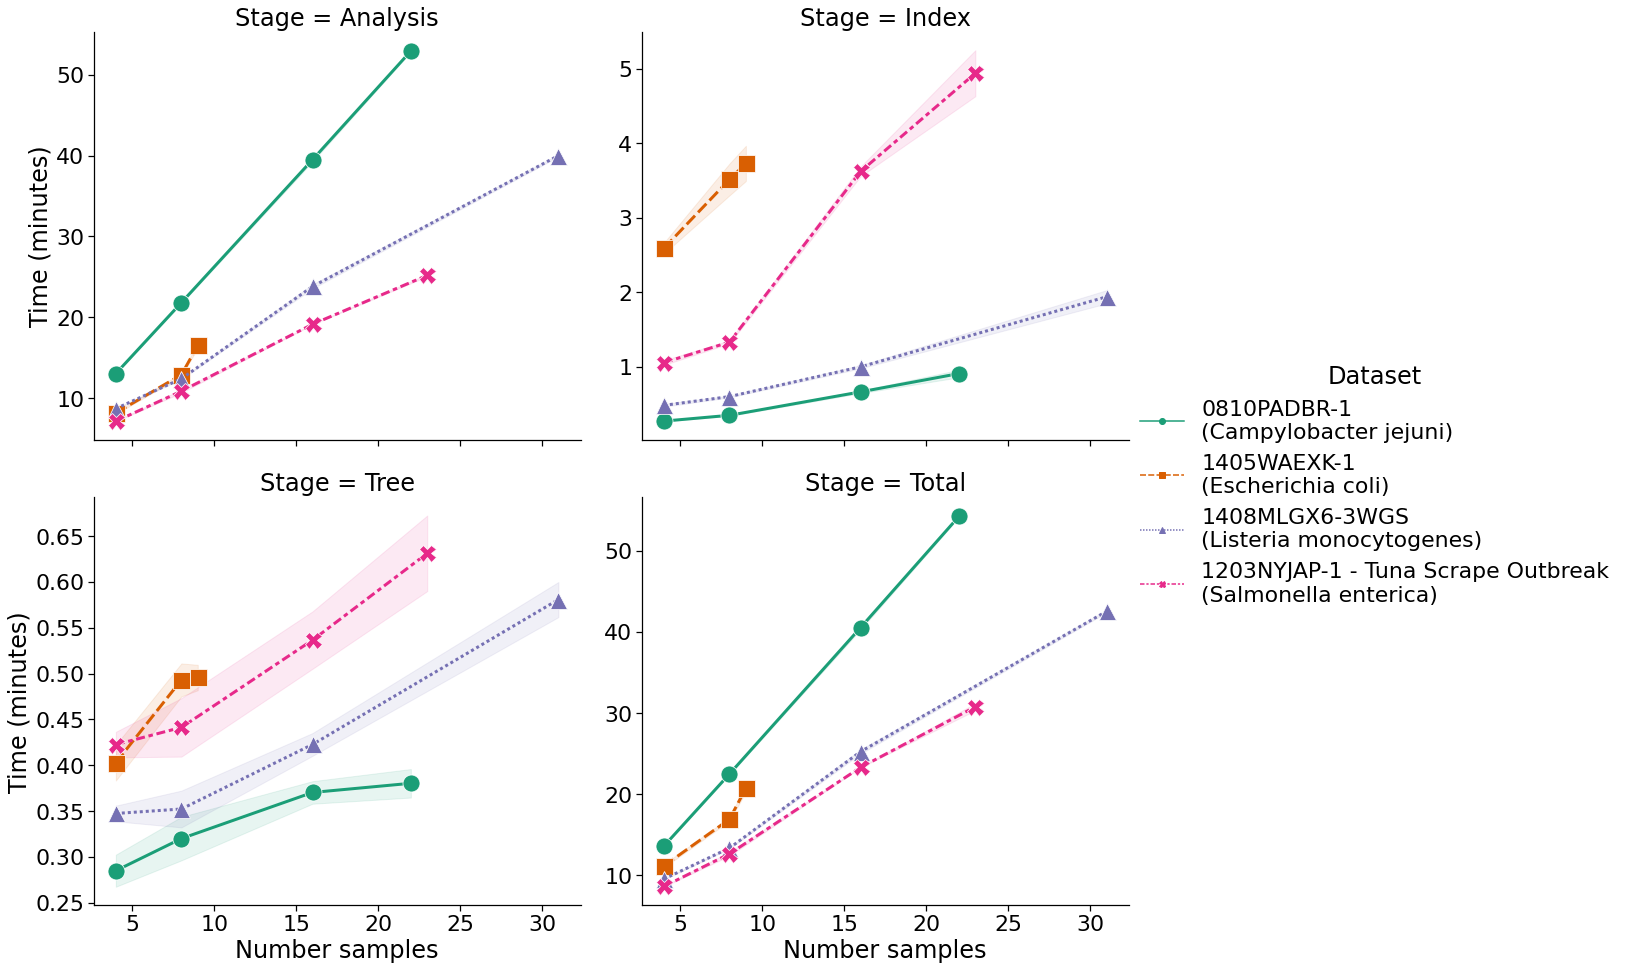

In [10]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number samples', y='Time (minutes)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_runtime_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=2,
                    hue_order=organism_hue_order,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-runtime.pdf')

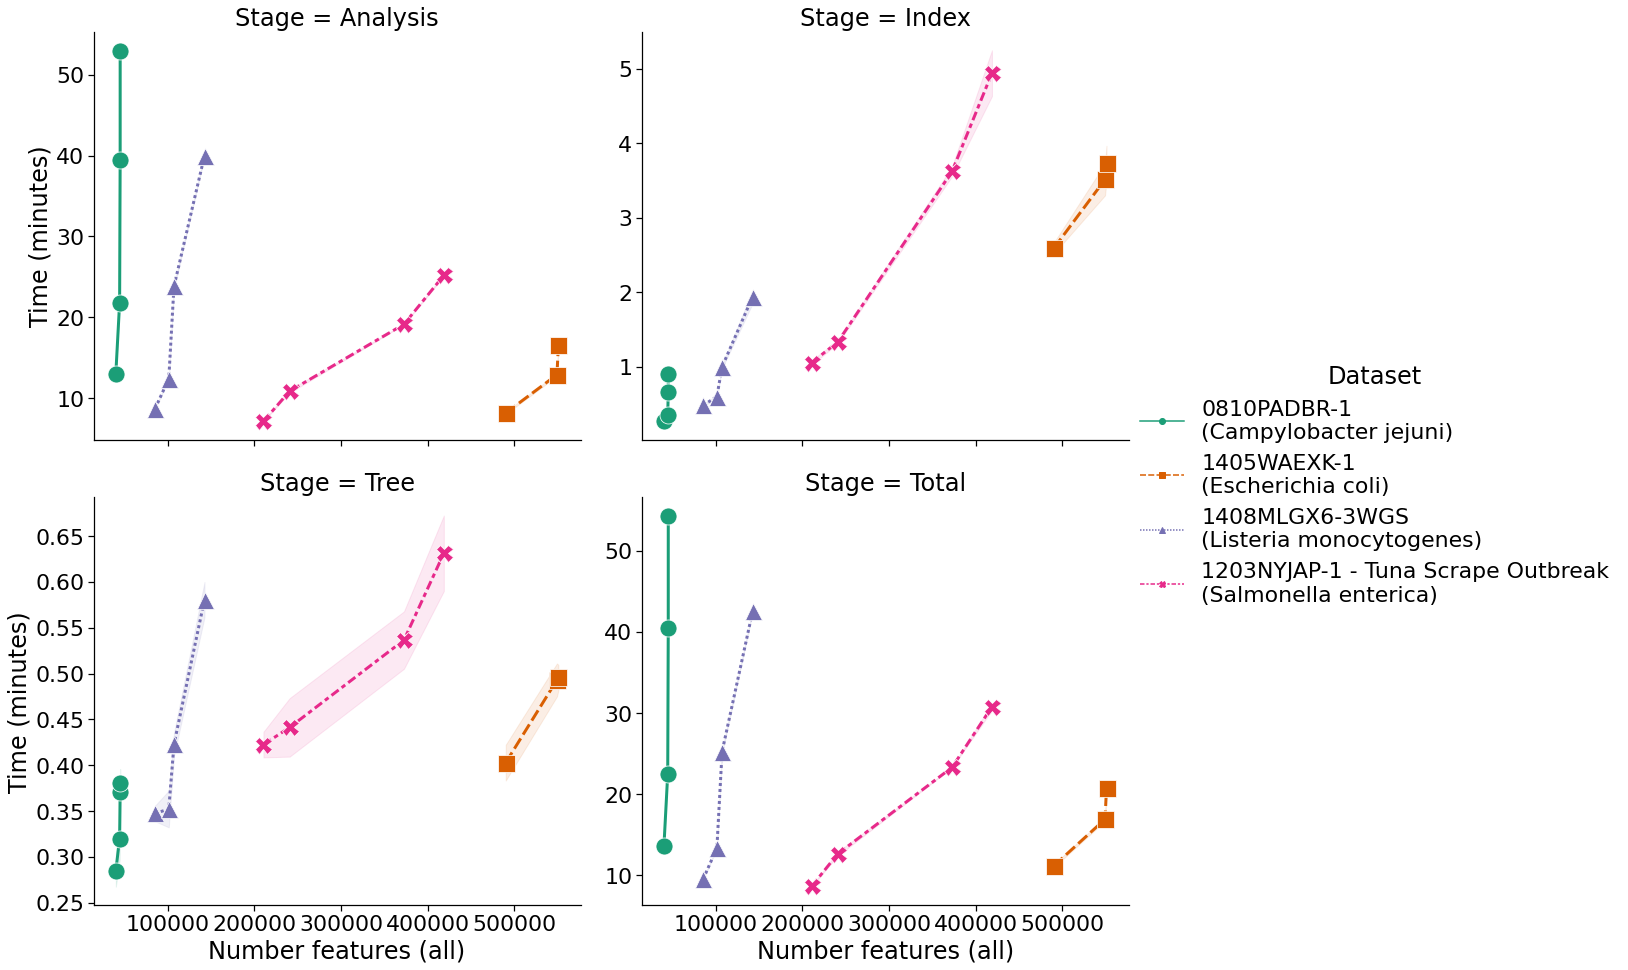

In [11]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number features (all)', y='Time (minutes)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_runtime_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=2,
                    hue_order=organism_hue_order,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-runtime-features-no-unknown.pdf')

#### 2.1.2.3. Mean/stdevs

In [12]:
index_info_runtime_df[['Dataset', 'Stage', 'Number samples', 'Time (minutes)']]\
 .groupby(['Dataset', 'Number samples', 'Stage']).agg(['mean', 'std', 'count'])

Time (minutes)  \
                                                                                     mean   
Dataset                                            Number samples Stage                     
0810PADBR-1\n(Campylobacter jejuni)                4              Analysis      13.037167   
                                                                  Index          0.268056   
                                                                  Total         13.590111   
                                                                  Tree           0.284889   
                                                   8              Analysis      21.817833   
                                                                  Index          0.345778   
                                                                  Total         22.483556   
                                                                  Tree           0.319944   
                                                   16             Analysis      39.510444   
                                                                  Index          0.660500   
                                                                  Total         40.541222   
                                                                  Tree           0.370278   
                                                   22             Analysis      52.963444   
                                                                  Index          0.906278   
                                                                  Total         54.250000   
                                                                  Tree           0.380278   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... 4              Analysis       7.132389   
                                                                  Index          1.053111   
                                                                  Total          8.608000   
                                                                  Tree           0.422500   
                                                   8              Analysis      10.858611   
                                                                  Index          1.329611   
                                                                  Total         12.629500   
                                                                  Tree           0.441278   
                                                   16             Analysis      19.135889   
                                                                  Index          3.621333   
                                                                  Total         23.293778   
                                                                  Tree           0.536556   
                                                   23             Analysis      25.193889   
                                                                  Index          4.939944   
                                                                  Total         30.765111   
                                                                  Tree           0.631278   
1405WAEXK-1\n(Escherichia coli)                    4              Analysis       8.157389   
                                                                  Index          2.589722   
                                                                  Total         11.149889   
                                                                  Tree           0.402778   
                                                   8              Analysis      12.890056   
                                                                  Index          3.513167   
                                                                  Total         16.896278   
                                                                  Tree           0.493056   
                                                   9              Analysis  

## 2.2. Memory plots

In [13]:
def melt_memory(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df[~df['Tree memory (max)'].isna()]
    value_vars = ['Analysis memory (max)', 'Index memory (max)', 'Tree memory (max)']

    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df['value'] = df['value'].apply(lambda x: x/(1024**3))
    df = df.rename({'variable': 'Stage', 'value': 'Peak Memory (GB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' memory (max)', '', regex=False)
        
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    return df

index_info_memory_df = melt_memory(index_info_df, id_vars=['Name', 'Dataset', 'Number features (no unknown)',
                                                           'Number samples', 'Reference length'])
index_info_memory_df

,Name,Dataset,Number features (no unknown),Number samples,Reference length,Stage,Peak Memory (GB),Reference length (Mbp)
0,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),855,4,1634890,Analysis,5.945530,1.634890
1,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),855,4,1634890,Analysis,5.936184,1.634890
2,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),855,4,1634890,Analysis,5.918362,1.634890
3,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),1092,8,1634890,Analysis,9.942890,1.634890
4,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),1092,8,1634890,Analysis,9.841484,1.634890
...,...,...,...,...,...,...,...,...
130,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,151,16,4808805,Tree,0.970222,4.808805
131,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,151,16,4808805,Tree,0.970314,4.808805
132,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,165,23,4808805,Tree,1.243538,4.808805
133,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,165,23,4808805,Tree,1.243515,4.808805


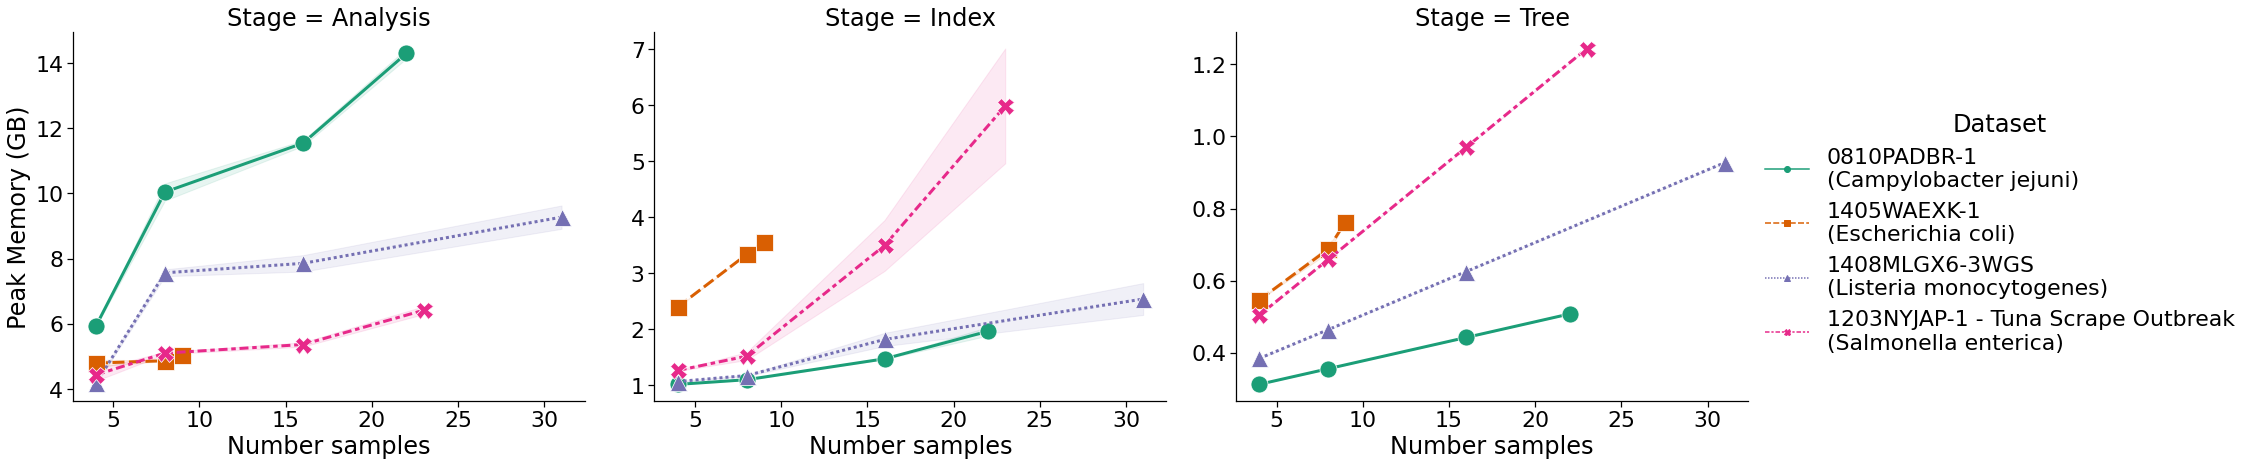

In [14]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number samples', y='Peak Memory (GB)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_memory_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=3,
                    hue_order=organism_hue_order,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-memory.pdf')

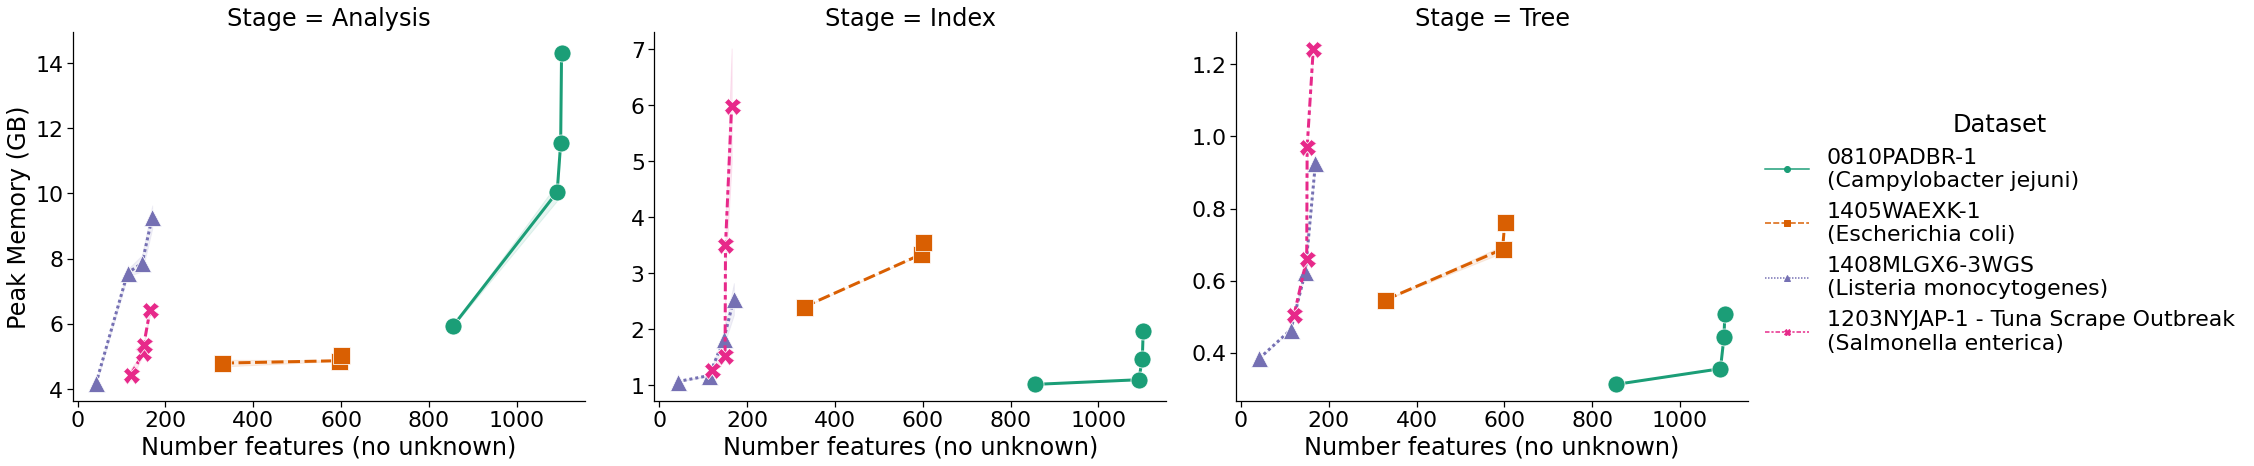

In [15]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number features (no unknown)', y='Peak Memory (GB)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_memory_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=3,
                    hue_order=organism_hue_order,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-memory.pdf')

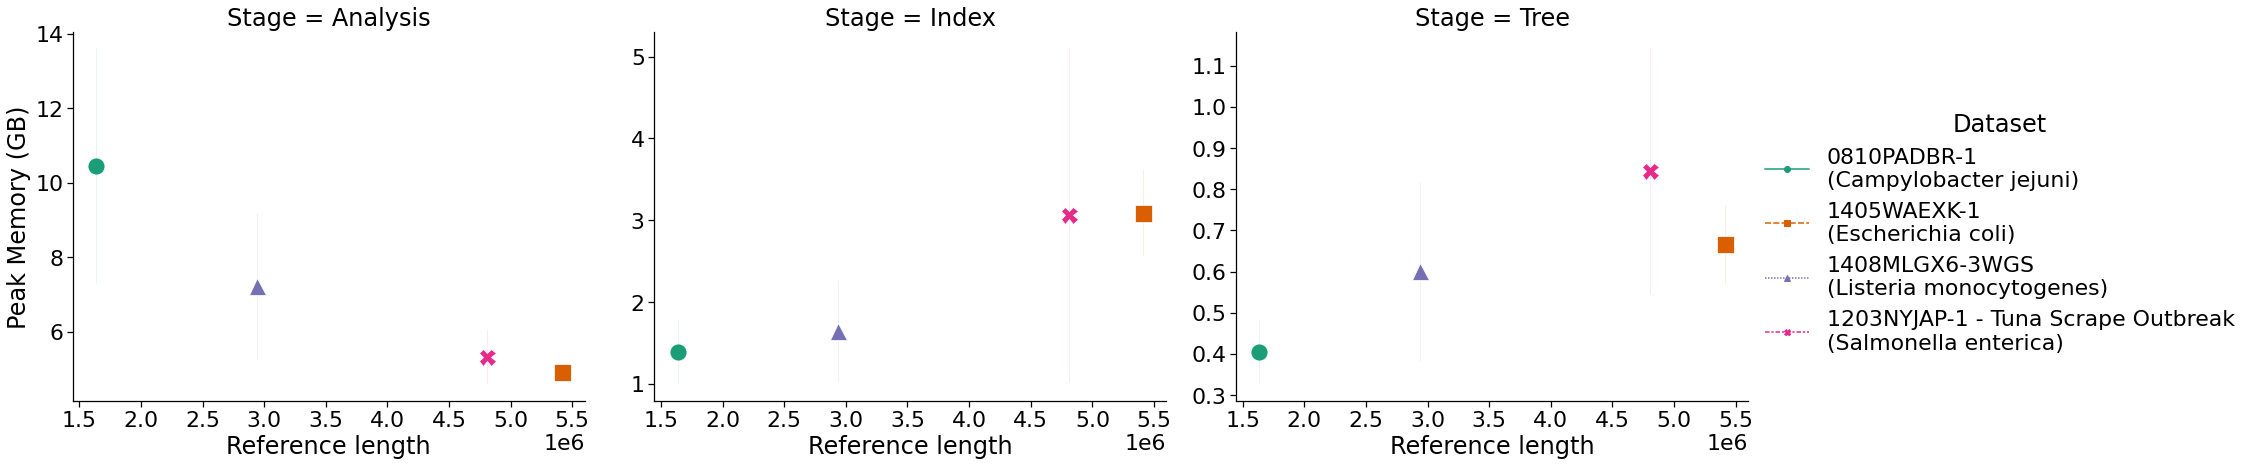

In [16]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Reference length', y='Peak Memory (GB)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_memory_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=3,
                    hue_order=organism_hue_order,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-memory.pdf')

### 2.2.1. Mean/stddev

In [17]:
index_info_memory_df[['Dataset', 'Number samples', 'Stage', 'Peak Memory (GB)']]\
 .groupby(['Dataset', 'Number samples', 'Stage']).agg(['mean', 'std', 'count'])

Peak Memory (GB)  \
                                                                                       mean   
Dataset                                            Number samples Stage                       
0810PADBR-1\n(Campylobacter jejuni)                4              Analysis         5.933359   
                                                                  Index            1.011066   
                                                                  Tree             0.312496   
                                                   8              Analysis        10.041862   
                                                                  Index            1.094536   
                                                                  Tree             0.355769   
                                                   16             Analysis        11.537782   
                                                                  Index            1.467871   
                                                                  Tree             0.442482   
                                                   22             Analysis        14.291066   
                                                                  Index            1.959923   
                                                                  Tree             0.507744   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... 4              Analysis         4.434222   
                                                                  Index            1.259375   
                                                                  Tree             0.504391   
                                                   8              Analysis         5.100440   
                                                                  Index            1.515475   
                                                                  Tree             0.658890   
                                                   16             Analysis         5.364473   
                                                                  Index            3.492201   
                                                                  Tree             0.970108   
                                                   23             Analysis         6.415507   
                                                                  Index            5.986331   
                                                                  Tree             1.243735   
1405WAEXK-1\n(Escherichia coli)                    4              Analysis         4.794272   
                                                                  Index            2.392865   
                                                                  Tree             0.546706   
                                                   8              Analysis         4.867841   
                                                                  Index            3.331860   
                                                                  Tree             0.687449   
                                                   9              Analysis         5.041630   
                                                                  Index            3.547512   
                                                                  Tree             0.763329   
1408MLGX6-3WGS\n(Listeria monocytogenes)           4              Analysis         4.169486   
                                                                  Index            1.061606   
                                                                  Tree             0.384338   
                                                   8              Analysis         7.564170   
                                                                  Index            1.168900   
                                                                  Tree             0.464165   
                                                   16             Analysis         7.

## 2.3. Disk usage plots

In [18]:
def melt_disk_usage(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()   
    df['Total size'] = df['Analysis disk uage'] + df['Index size']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=['Analysis disk uage', 'Index size'])
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Disk (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' disk uage', '', regex=False)
    df['Stage'] = df['Stage'].str.replace(' size', '', regex=False)
    
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    return df
index_info_disk_df = melt_disk_usage(index_info_df, id_vars=['Name', 'Dataset',
                                                             'Number samples', 'Reference length'])
index_info_disk_df

,Name,Dataset,Number samples,Reference length,Stage,Disk (MB),Reference length (Mbp)
0,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),4,1634890,Analysis,5351.144531,1.634890
1,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),4,1634890,Analysis,5351.148438,1.634890
2,case-04:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),4,1634890,Analysis,5351.132812,1.634890
3,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),8,1634890,Analysis,6972.957031,1.634890
4,case-08:0810PADBR-1,0810PADBR-1\n(Campylobacter jejuni),8,1634890,Analysis,6972.945312,1.634890
...,...,...,...,...,...,...,...
85,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,16,4808805,Index,62.511719,4.808805
86,case-16:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,16,4808805,Index,63.046875,4.808805
87,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,23,4808805,Index,73.984375,4.808805
88,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,23,4808805,Index,73.593750,4.808805


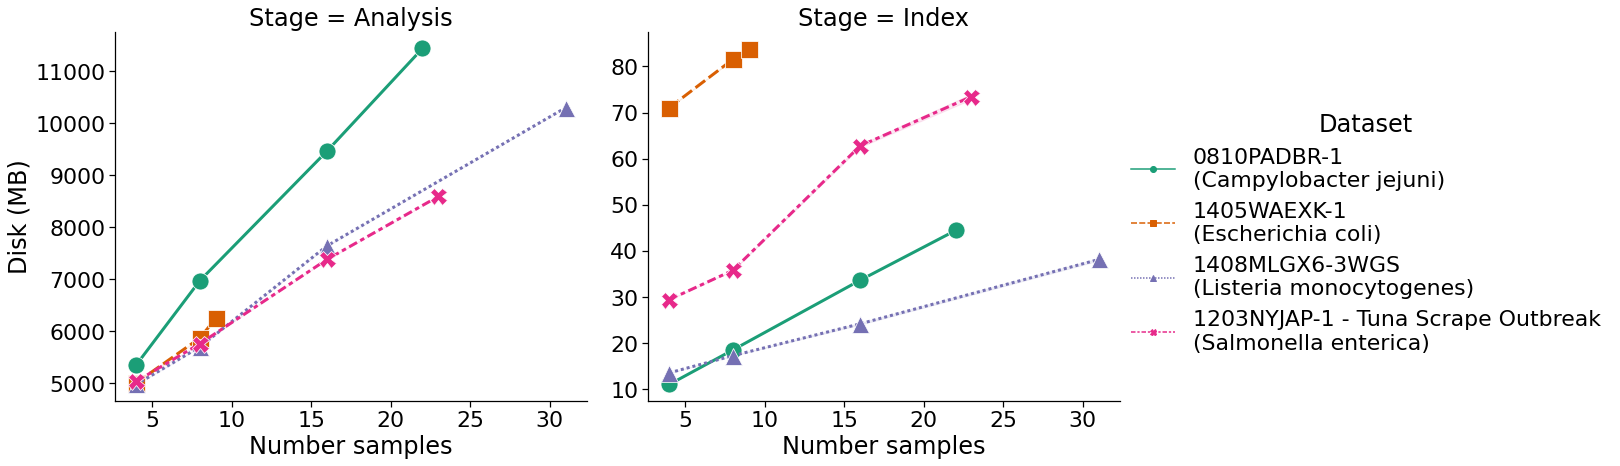

In [19]:
with sns.plotting_context("notebook", font_scale=2):
    g = sns.relplot(x='Number samples', y='Disk (MB)', hue="Dataset", style="Dataset", ci="sd", kind="line",
                    data=index_info_disk_df, col="Stage", markers=organism_markers, estimator='mean',
                    height=7, aspect=1.2, linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=organism_palette,
                    col_wrap=2,
                    hue_order=organism_hue_order,
                    facet_kws={'sharey': False, 'sharex': True})
    plt.savefig('figures/index-disk.pdf')

### 2.3.1. Mean/stddev

In [20]:
index_info_disk_df[['Dataset', 'Number samples', 'Stage', 'Disk (MB)']]\
 .groupby(['Dataset', 'Number samples', 'Stage']).agg(['mean', 'std', 'count'])

Disk (MB)  \
                                                                                    mean   
Dataset                                            Number samples Stage                    
0810PADBR-1\n(Campylobacter jejuni)                4              Analysis   5351.141927   
                                                                  Index        11.039062   
                                                   8              Analysis   6972.954427   
                                                                  Index        18.519531   
                                                   16             Analysis   9468.496094   
                                                                  Index        33.640625   
                                                   22             Analysis  11442.511719   
                                                                  Index        44.434896   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... 4              Analysis   5035.611979   
                                                                  Index        29.433594   
                                                   8              Analysis   5760.180990   
                                                                  Index        35.785156   
                                                   16             Analysis   7382.967448   
                                                                  Index        62.776042   
                                                   23             Analysis   8594.183594   
                                                                  Index        73.468750   
1405WAEXK-1\n(Escherichia coli)                    4              Analysis   5006.256510   
                                                                  Index        71.053385   
                                                   8              Analysis   5868.945312   
                                                                  Index        81.541667   
                                                   9              Analysis   6246.947917   
                                                                  Index        83.820312   
1408MLGX6-3WGS\n(Listeria monocytogenes)           4              Analysis   4975.930990   
                                                                  Index        13.555990   
                                                   8              Analysis   5698.148438   
                                                                  Index        17.273438   
                                                   16             Analysis   7644.519531   
                                                                  Index        24.190104   
                                                   31             Analysis  10302.063802   
                                                                  Index        38.141927   

                                                                                      \
                                                                                 std   
Dataset                                            Number samples Stage                
0810PADBR-1\n(Campylobacter jejuni)                4              Analysis  0.008132   
                                                                  Index     0.010335   
                                                   8              Analysis  0.008132   
                                                                  Index     0.011719   
                                                   16             Analysis  0.025615   
                                                                  Index     0.017027   
                                                   22             Analysis  0.013532   
                                                                  Index     0.117274   
1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonella... 4              Analysis

# 3. Sample vs. features plots

In [21]:
sample_features_df = index_info_df[['Dataset', 'Number samples', 'Number features (all)', 'Number features (no unknown)']].copy()
sample_features_df['Number features (unknown)'] = sample_features_df['Number features (all)'] - sample_features_df['Number features (no unknown)'] 
sample_features_df = sample_features_df.groupby(['Dataset', 'Number samples']).agg({
    'Number features (all)': 'first',
    'Number features (unknown)': 'first',
    'Number features (no unknown)': 'first',
})
sample_features_df = sample_features_df.reset_index()
sample_features_df = pd.melt(sample_features_df, id_vars=['Dataset', 'Number samples'],
                             value_vars=['Number features (all)', 'Number features (unknown)',
                                         'Number features (no unknown)'])
sample_features_df = sample_features_df.rename({'value': 'Count', 'variable': 'Type'}, axis='columns')
sample_features_df

,Dataset,Number samples,Type,Count
0,0810PADBR-1\n(Campylobacter jejuni),4,Number features (all),40115
1,0810PADBR-1\n(Campylobacter jejuni),8,Number features (all),44494
2,0810PADBR-1\n(Campylobacter jejuni),16,Number features (all),45101
3,0810PADBR-1\n(Campylobacter jejuni),22,Number features (all),45117
4,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,4,Number features (all),210445
5,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,8,Number features (all),240688
6,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,16,Number features (all),372603
7,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,23,Number features (all),418622
8,1405WAEXK-1\n(Escherichia coli),4,Number features (all),490019
9,1405WAEXK-1\n(Escherichia coli),8,Number features (all),549134


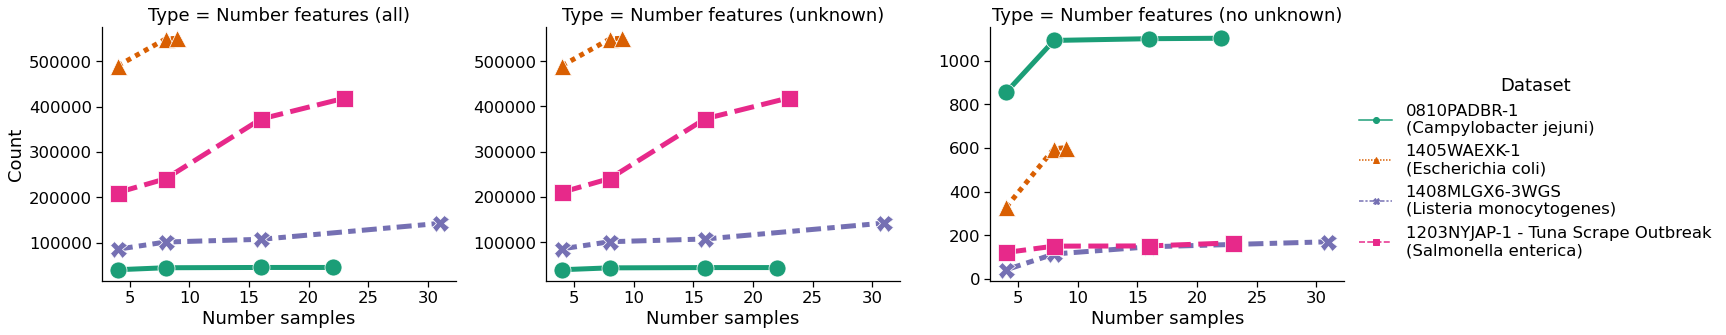

In [22]:
with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.relplot(x='Number samples', y='Count', hue='Dataset', style='Dataset',
                    col='Type',
                    kind="line",
                    data=sample_features_df, markers=organism_markers,
                    palette=organism_palette,
                    hue_order=organism_hue_order,
                    height=5, aspect=1.3, linewidth=5, markersize=17, err_kws={"alpha": 0.2},
                    facet_kws={'sharey': False, 'sharex': True})
    
    plt.savefig('figures/samples-features.pdf')

# 4. Stats models

In [23]:
index_info_runtime_mean_df = index_info_runtime_df[
    ['Name', 'Stage', 'Time (minutes)', 'Number samples', 'Number features (all)',
     'Number features (no unknown)', 'Reference length']].groupby(
    ['Name', 'Stage']).agg(['mean', 'std', 'count'])
index_info_runtime_mean_df.columns = list(map('_'.join, index_info_runtime_mean_df.columns.values))
index_info_runtime_mean_df = index_info_runtime_mean_df.rename({
    'Time (minutes)_mean': 'time',
    'Number samples_mean': 'samples',
    'Number features (all)_mean': 'features',
    'Number features (no unknown)_mean': 'features_no_unknown',
    'Reference length_mean': 'reference',
    }, axis='columns')
index_info_runtime_mean_df

time  \
Name                                         Stage                 
case-04:0810PADBR-1                          Analysis  13.037167   
                                             Index      0.268056   
                                             Total     13.590111   
                                             Tree       0.284889   
case-04:1203NYJAP-1 - Tuna Scrape Outbreak   Analysis   7.132389   
                                             Index      1.053111   
                                             Total      8.608000   
                                             Tree       0.422500   
case-04:1405WAEXK-1                          Analysis   8.157389   
                                             Index      2.589722   
                                             Total     11.149889   
                                             Tree       0.402778   
case-04:1408MLGX6-3WGS                       Analysis   8.697556   
                                             Index      0.479667   
                                             Total      9.524556   
                                             Tree       0.347333   
case-08:0810PADBR-1                          Analysis  21.817833   
                                             Index      0.345778   
                                             Total     22.483556   
                                             Tree       0.319944   
case-08:1203NYJAP-1 - Tuna Scrape Outbreak   Analysis  10.858611   
                                             Index      1.329611   
                                             Total     12.629500   
                                             Tree       0.441278   
case-08:1405WAEXK-1                          Analysis  12.890056   
                                             Index      3.513167   
                                             Total     16.896278   
                                             Tree       0.493056   
case-08:1408MLGX6-3WGS                       Analysis  12.392944   
                                             Index      0.597444   
                                             Total     13.342611   
                                             Tree       0.352222   
case-16:0810PADBR-1                          Analysis  39.510444   
                                             Index      0.660500   
                                             Total     40.541222   
                                             Tree       0.370278   
case-16:1203NYJAP-1 - Tuna Scrape Outbreak   Analysis  19.135889   
                                             Index      3.621333   
                                             Total     23.293778   
                                             Tree       0.536556   
case-16:1408MLGX6-3WGS                       Analysis  23.816833   
                                             Index      0.997111   
                                             Total     25.236611   
                                             Tree       0.422667   
case-full:0810PADBR-1                        Analysis  52.963444   
                                             Index      0.906278   
                                             Total     54.250000   
                                             Tree       0.380278   
case-full:1203NYJAP-1 - Tuna Scrape Outbreak Analysis  25.193889   
                                             Index      4.939944   
                                             Total     30.765111   
                                             Tree       0.631278   
case-full:1405WAEXK-1                        Analysis  16.511000   
                                             Index      3.729056   
                                             Total     20.735778   
                                             Tree       0.495722   
case-full:1408MLGX6-3WGS                     Analysis  40.013222   
                                             Ind

In [24]:
import statsmodels.formula.api as smf
from typing import Set

def stats_model_differences(response_variable: str, explanatory_variables: Set[str],
                            df: pd.DataFrame) -> pd.DataFrame:
    def change_rsquared(model1, model2) -> float:
        return model1.rsquared - model2.rsquared
    
    model_all_str = f'{response_variable} ~ {"+".join(explanatory_variables)}'
    print(f'All model: {model_all_str}')
    model_all = smf.ols(model_all_str, data=df).fit()
    data = [[model_all_str, pd.NA, model_all.rsquared, change_rsquared(model_all, model_all)]]
    columns = ['Model', 'Selected variable', 'R-squared', 'R-squared change']
    
    for selected_explanatory in explanatory_variables:
        other_explanatory = explanatory_variables - {selected_explanatory}
        model_removed_str = f'{response_variable} ~ {"+".join(other_explanatory)}'
        model_removed = smf.ols(model_removed_str, data=df).fit()
        
        data.append([model_removed_str, selected_explanatory, model_removed.rsquared,
                     change_rsquared(model_all, model_removed)])
    
    return pd.DataFrame(data=data, columns=columns)

def stats_model_differences_stages(response_variable: str, explanatory_variables: Set[str],
                                   info_df: pd.DataFrame) -> pd.DataFrame:
    stages = info_df.reset_index()['Stage'].value_counts().index.tolist()
    results_dfs = []
    for stage in stages:
        df = info_df.loc[pd.IndexSlice[:, stage], :]
        df.index = df.index.droplevel('Stage')
        
        model_stage_df = stats_model_differences(response_variable='time',
                                                 explanatory_variables={'samples', 'features', 'reference'},
                                                 df=df)
        model_stage_df['Stage'] = stage
        results_dfs.append(model_stage_df)
    
    return pd.concat(results_dfs)

model_df = stats_model_differences_stages(response_variable='time',
                                   explanatory_variables={'samples', 'features', 'reference'},
                                   info_df=index_info_runtime_mean_df)
model_df = model_df.sort_values(['Stage', 'R-squared change'])
# model_df = model_df.set_index(['Stage', 'Selected variable'])
model_df

All model: time ~ samples+reference+features
All model: time ~ samples+reference+features
All model: time ~ samples+reference+features
All model: time ~ samples+reference+features


,Model,Selected variable,R-squared,R-squared change,Stage
0,time ~ samples+reference+features,<NA>,0.857852,0.000000,Analysis
3,time ~ samples+reference,features,0.829559,0.028293,Analysis
2,time ~ samples+features,reference,0.761535,0.096317,Analysis
1,time ~ features+reference,samples,0.383280,0.474572,Analysis
0,time ~ samples+reference+features,<NA>,0.922854,0.000000,Index
2,time ~ samples+features,reference,0.922616,0.000238,Index
1,time ~ features+reference,samples,0.788267,0.134587,Index
3,time ~ samples+reference,features,0.775784,0.147069,Index
0,time ~ samples+reference+features,<NA>,0.868073,0.000000,Total
3,time ~ samples+reference,features,0.823729,0.044344,Total


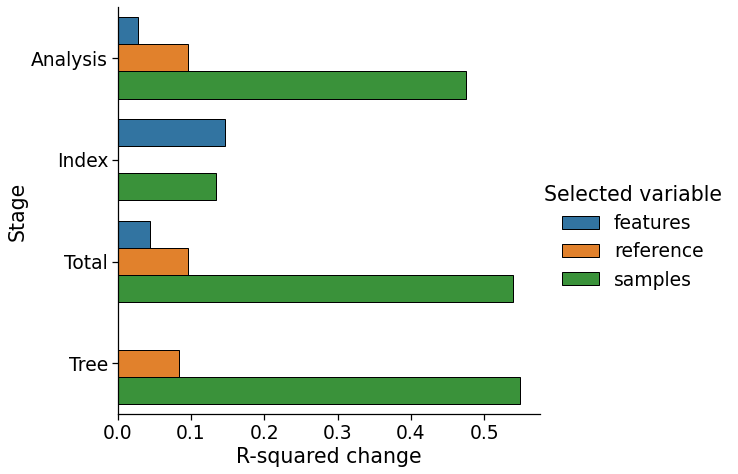

In [25]:
with sns.plotting_context("notebook", font_scale=1.7):
    g = sns.catplot(x='R-squared change', y='Stage', hue="Selected variable", kind="bar",
                    data=model_df, edgecolor='black',
                    height=7, aspect=1.2)
    # plt.savefig('figures/index-runtime.pdf')

# 5. Comparison to full index

In [26]:
index_info_df.columns

Index(['Name', 'Reference name', 'Iteration', 'Number samples',
       'Number features (all)', 'Number features (no unknown)', 'Number cores',
       'Reference length', 'Analysis runtime', 'Analysis memory (max)',
       'Analysis memory (max/process)', 'Analysis disk uage', 'Index runtime',
       'Index memory (max)', 'Index memory (max/process)', 'Index size',
       'Tree runtime', 'Tree memory (max)', 'Tree memory (max/process)',
       'Total runtime', 'Max memory', 'Case', 'Dataset', 'dataSetName',
       'Organism'],
      dtype='object')

In [27]:
index_info_full_df = index_info_df[index_info_df['Case'] == 'case-full'].reset_index(drop=True)

def agg_info(df: pd.DataFrame) -> pd.DataFrame:
    df = df.groupby(['Dataset', 'Iteration']).agg({
        'Number samples': 'sum',
        'Number features (all)': 'sum',
        'Number features (no unknown)': 'sum',
        'Analysis runtime': 'sum',
        'Analysis memory (max)': 'max',
        'Analysis disk uage': 'sum',
        'Index runtime': 'sum',
        'Index memory (max)': 'max',
        'Index size': 'sum',
        'Tree runtime': 'sum',
        'Tree memory (max)': 'max',
        'Total runtime': 'sum',
        'Max memory': 'max',
    })
    return df

# index_info_full_df = agg_info(index_info_full_df).reset_index()
index_info_full_df['Type'] = 'Separate indexes'
index_info_full_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Case,Dataset,dataSetName,Organism,Type
0,case-full:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3171.42,1.553198e+10,...,23.70,5.447557e+08,276512768.0,3247.96,1.553198e+10,case-full,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni,Separate indexes
1,case-full:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,22,45117,1102,4,1634890,3179.25,1.528488e+10,...,22.91,5.452268e+08,277155840.0,3260.02,1.528488e+10,case-full,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni,Separate indexes
2,case-full:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,22,45117,1102,4,1634890,3182.75,1.521789e+10,...,21.84,5.455749e+08,277159936.0,3257.02,1.521789e+10,case-full,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni,Separate indexes
3,case-full:1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,1,9,550816,601,4,5412686,1009.93,5.456482e+09,...,29.59,8.196137e+08,459304960.0,1264.11,5.456482e+09,case-full,1405WAEXK-1\n(Escherichia coli),1405WAEXK-1,Escherichia coli,Separate indexes
4,case-full:1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,2,9,550816,601,4,5412686,974.12,5.432742e+09,...,29.00,8.200069e+08,459247616.0,1212.28,5.432742e+09,case-full,1405WAEXK-1\n(Escherichia coli),1405WAEXK-1,Escherichia coli,Separate indexes
5,case-full:1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,3,9,550816,601,4,5412686,987.93,5.351002e+09,...,30.64,8.192328e+08,458911744.0,1256.05,5.351002e+09,case-full,1405WAEXK-1\n(Escherichia coli),1405WAEXK-1,Escherichia coli,Separate indexes
6,case-full:1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,1,31,142442,170,4,2939733,2399.63,9.511617e+09,...,34.10,9.954918e+08,660688896.0,2556.02,9.511617e+09,case-full,1408MLGX6-3WGS\n(Listeria monocytogenes),1408MLGX6-3WGS,Listeria monocytogenes,Separate indexes
7,case-full:1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,2,31,142442,170,4,2939733,2393.18,1.015651e+10,...,34.27,9.959342e+08,661512192.0,2541.47,1.015651e+10,case-full,1408MLGX6-3WGS\n(Listeria monocytogenes),1408MLGX6-3WGS,Listeria monocytogenes,Separate indexes
8,case-full:1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,3,31,142442,170,4,2939733,2409.57,1.019561e+10,...,36.17,9.961595e+08,661090304.0,2558.04,1.019561e+10,case-full,1408MLGX6-3WGS\n(Listeria monocytogenes),1408MLGX6-3WGS,Listeria monocytogenes,Separate indexes
9,case-full:1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,1,23,418622,165,4,4808805,1503.61,6.742589e+09,...,36.33,1.335239e+09,869785600.0,1815.62,7.043727e+09,case-full,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,Separate indexes


In [28]:
single_index_info_nm_df = pd.read_csv(cases_root_dir / 'case-full-si' / 'index-info.tsv', sep='\t')

single_index_info_full_df = single_index_info_nm_df.merge(metadata_df, left_on='Name', right_on='dataSetName')
single_index_info_full_df['Dataset'] = single_index_info_full_df['Name'] + '\n(' + single_index_info_full_df['Organism'] + ')'

# single_index_info_full_df = agg_info(single_index_info_full_df).reset_index()
single_index_info_full_df['Type'] = 'Same index'
single_index_info_full_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,dataSetName,Organism,Dataset,Type
0,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3182.28,1.613869e+10,...,46530560.0,22.60,5.452759e+08,277008384.0,3255.69,1.613869e+10,0810PADBR-1,Campylobacter jejuni,0810PADBR-1\n(Campylobacter jejuni),Same index
1,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,22,45117,1102,4,1634890,3167.20,1.586500e+10,...,46571520.0,21.17,5.451858e+08,276873216.0,3243.04,1.586500e+10,0810PADBR-1,Campylobacter jejuni,0810PADBR-1\n(Campylobacter jejuni),Same index
2,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,22,45117,1102,4,1634890,3172.68,1.513830e+10,...,46485504.0,23.58,5.452022e+08,277131264.0,3250.60,1.513830e+10,0810PADBR-1,Campylobacter jejuni,0810PADBR-1\n(Campylobacter jejuni),Same index
3,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,1,9,550816,601,4,5412686,1002.94,5.379146e+09,...,133885952.0,30.27,8.193311e+08,459231232.0,1246.97,5.379146e+09,1405WAEXK-1,Escherichia coli,1405WAEXK-1\n(Escherichia coli),Same index
4,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,2,9,550816,601,4,5412686,1005.69,5.406933e+09,...,134455296.0,28.05,8.197120e+08,459165696.0,1249.99,5.406933e+09,1405WAEXK-1,Escherichia coli,1405WAEXK-1\n(Escherichia coli),Same index
5,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,3,9,550816,601,4,5412686,1010.36,5.406626e+09,...,134320128.0,29.71,8.190730e+08,459304960.0,1265.51,5.406626e+09,1405WAEXK-1,Escherichia coli,1405WAEXK-1\n(Escherichia coli),Same index
6,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,1,31,142442,170,4,2939733,2389.32,9.624535e+09,...,174043136.0,36.80,9.952788e+08,660123648.0,2543.37,9.624535e+09,1408MLGX6-3WGS,Listeria monocytogenes,1408MLGX6-3WGS\n(Listeria monocytogenes),Same index
7,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,2,31,142442,170,4,2939733,2395.74,9.404256e+09,...,174149632.0,36.10,9.945129e+08,659976192.0,2555.72,9.404256e+09,1408MLGX6-3WGS,Listeria monocytogenes,1408MLGX6-3WGS\n(Listeria monocytogenes),Same index
8,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,3,31,142442,170,4,2939733,2394.33,9.522840e+09,...,173445120.0,35.09,9.948774e+08,660574208.0,2545.66,9.522840e+09,1408MLGX6-3WGS,Listeria monocytogenes,1408MLGX6-3WGS\n(Listeria monocytogenes),Same index
9,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,1,23,418622,165,4,4808805,1520.36,7.003972e+09,...,250908672.0,36.24,1.336062e+09,869978112.0,1868.75,7.003972e+09,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,1203NYJAP-1 - Tuna Scrape Outbreak\n(Salmonell...,Same index


In [29]:
index_full_df = pd.concat([index_info_full_df, single_index_info_full_df])
index_full_df.head(3)

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Case,Dataset,dataSetName,Organism,Type
0,case-full:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3171.42,1.553198e+10,...,23.70,544755712.0,276512768.0,3247.96,1.553198e+10,case-full,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni,Separate indexes
1,case-full:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,22,45117,1102,4,1634890,3179.25,1.528488e+10,...,22.91,545226752.0,277155840.0,3260.02,1.528488e+10,case-full,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni,Separate indexes
2,case-full:0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,22,45117,1102,4,1634890,3182.75,1.521789e+10,...,21.84,545574912.0,277159936.0,3257.02,1.521789e+10,case-full,0810PADBR-1\n(Campylobacter jejuni),0810PADBR-1,Campylobacter jejuni,Separate indexes


In [30]:
index_full_runtimes_df = melt_runtimes(index_full_df, id_vars=['Dataset',
                                                               'Number samples', 'Reference length',
                                                               'Organism',
                                                               'Type'])
index_full_runtimes_df.head(3)

,Dataset,Number samples,Reference length,Organism,Type,Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp),Label
0,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,3171.42,52.857000,0.880950,144.155455,1.63489,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,3179.25,52.987500,0.883125,144.511364,1.63489,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
2,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,3182.75,53.045833,0.884097,144.670455,1.63489,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"


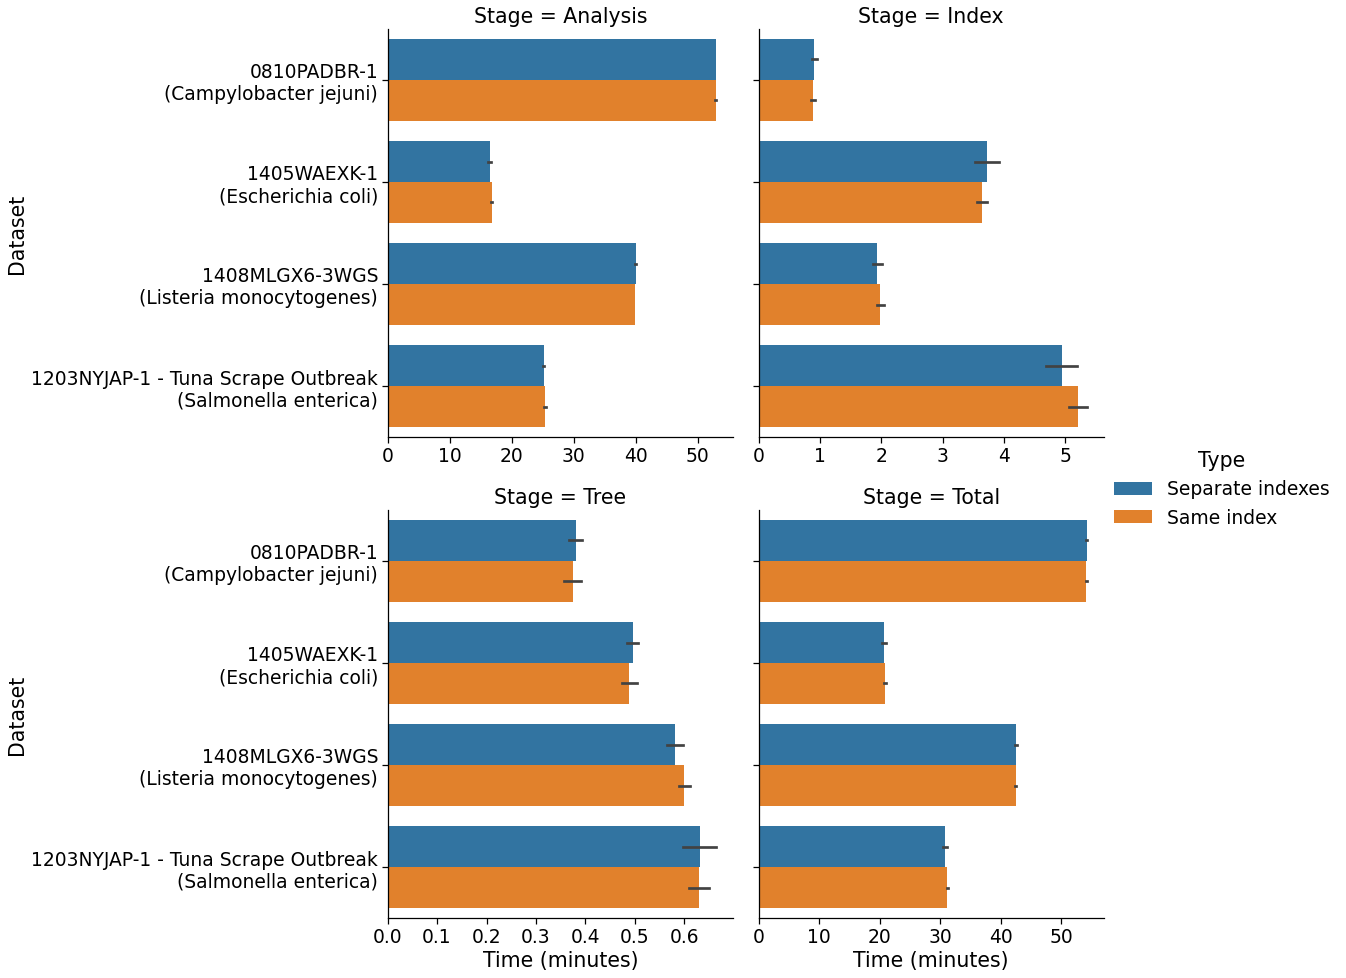

In [31]:
with sns.plotting_context("notebook", font_scale=1.7):
    g = sns.catplot(x='Time (minutes)', y='Dataset', hue="Type", ci="sd", kind="bar",
                    col='Stage',
                    data=index_full_runtimes_df,
                    height=7, aspect=1.2,
                    col_wrap=2,
                    sharex=False)
    # plt.savefig('figures/index-runtime.pdf')

In [32]:
index_full_memory_df = melt_memory(index_full_df, id_vars=['Dataset',
                                                               'Number samples', 'Reference length',
                                                               'Organism',
                                                               'Type'])
index_full_memory_df.head(3)

,Dataset,Number samples,Reference length,Organism,Type,Stage,Peak Memory (GB),Reference length (Mbp)
0,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,14.465282,1.63489
1,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,14.235149,1.63489
2,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,14.172768,1.63489


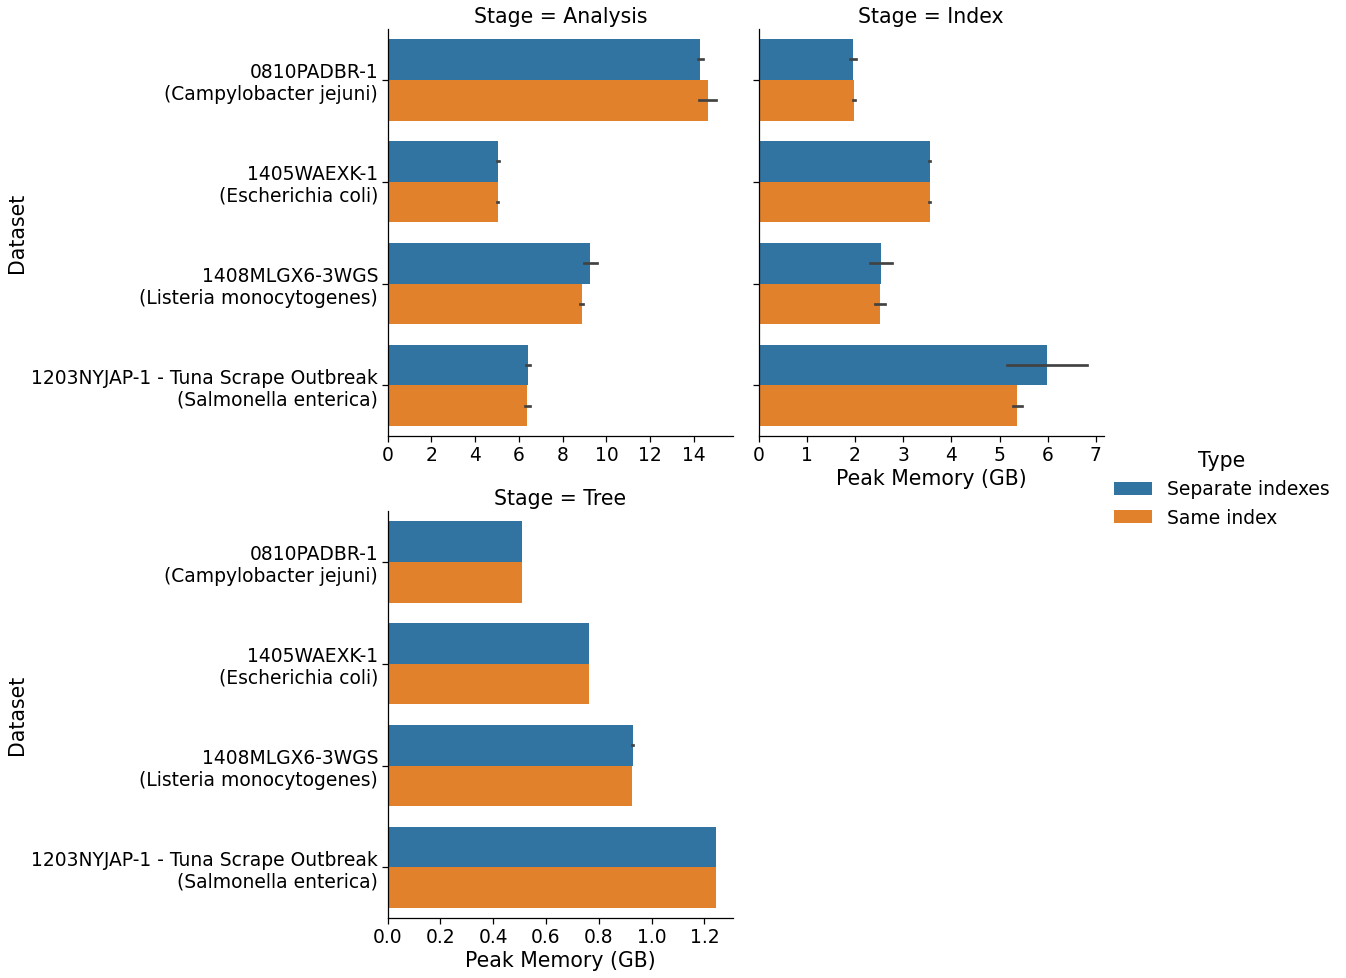

In [33]:
with sns.plotting_context("notebook", font_scale=1.7):
    g = sns.catplot(x='Peak Memory (GB)', y='Dataset', hue="Type", ci="sd", kind="bar",
                    col='Stage',
                    data=index_full_memory_df,
                    height=7, aspect=1.2,
                    col_wrap=2,
                    sharex=False)
    # plt.savefig('figures/index-runtime.pdf')

In [34]:
index_full_disk_df = melt_disk_usage(index_full_df, id_vars=['Dataset',
                                                               'Number samples', 'Reference length',
                                                               'Organism',
                                                               'Type'])
index_full_disk_df.head(3)

,Dataset,Number samples,Reference length,Organism,Type,Stage,Disk (MB),Reference length (Mbp)
0,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,11442.503906,1.63489
1,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,11442.503906,1.63489
2,0810PADBR-1\n(Campylobacter jejuni),22,1634890,Campylobacter jejuni,Separate indexes,Analysis,11442.527344,1.63489


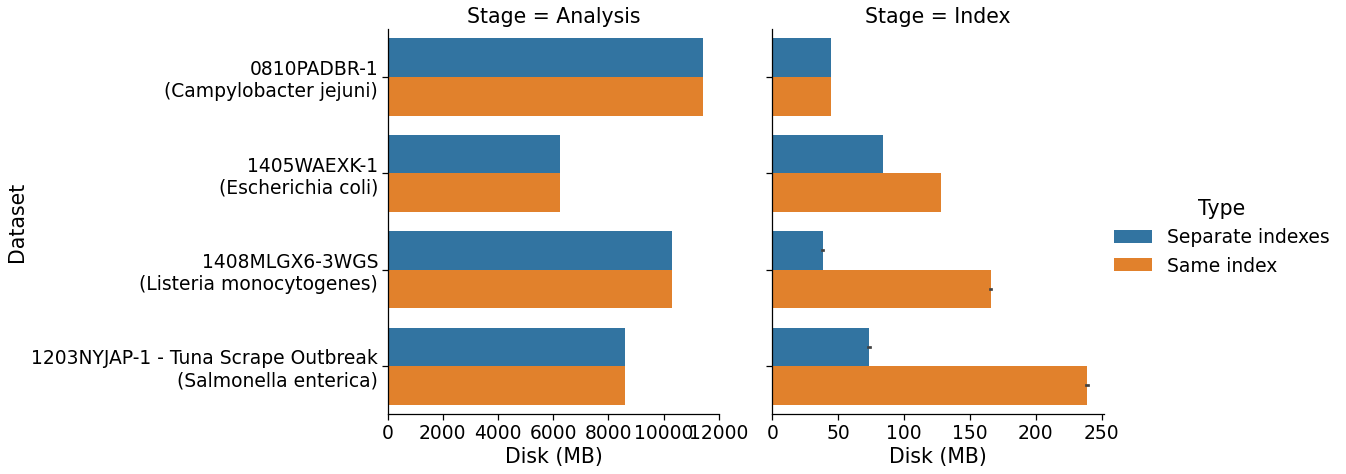

In [35]:
with sns.plotting_context("notebook", font_scale=1.7):
    g = sns.catplot(x='Disk (MB)', y='Dataset', hue="Type", ci="sd", kind="bar",
                    col='Stage',
                    data=index_full_disk_df,
                    height=7, aspect=1.2,
                    col_wrap=2,
                    sharex=False)
    # plt.savefig('figures/index-runtime.pdf')